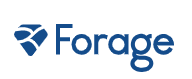

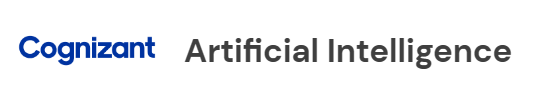

# TASK 1 : EDA AND DATA INSIGHTS FOR RECOMENDATION

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm


In [16]:
data = pd.read_csv('/content/sample_sales_data.csv')

In [17]:
data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [18]:
data = data.drop(columns=['Unnamed: 0'])


In [19]:
data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [29]:
data.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [22]:
data.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

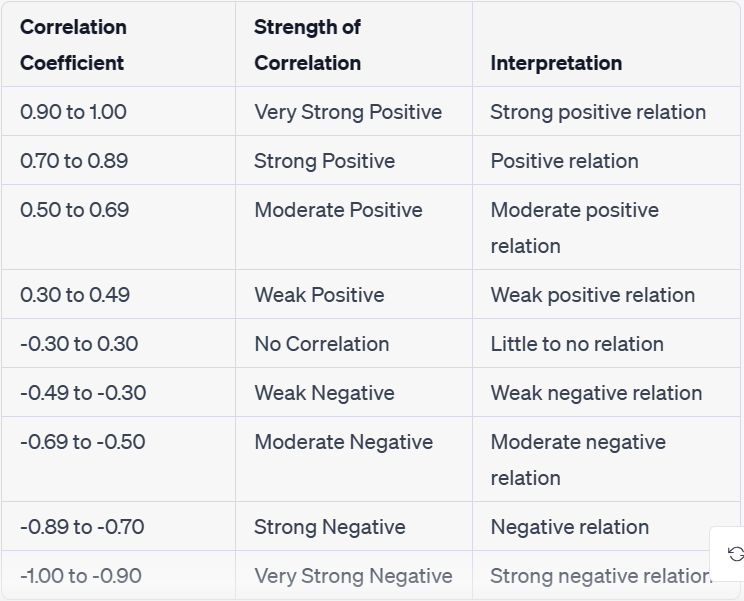

In [23]:
correlation_matrix = data.corr()
print(correlation_matrix)

            unit_price  quantity     total
unit_price    1.000000  0.024588  0.792018
quantity      0.024588  1.000000  0.521926
total         0.792018  0.521926  1.000000


<ipython-input-23-e02734b85495>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


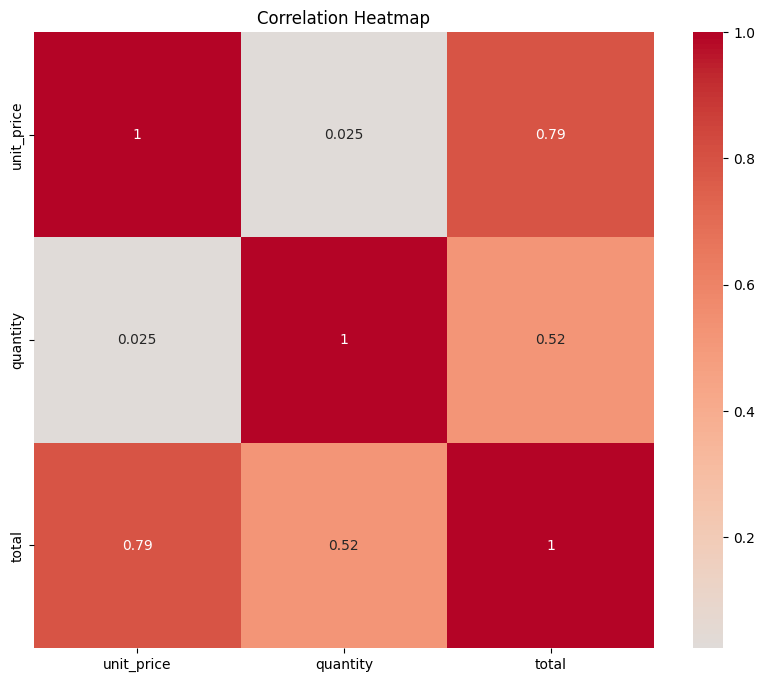

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


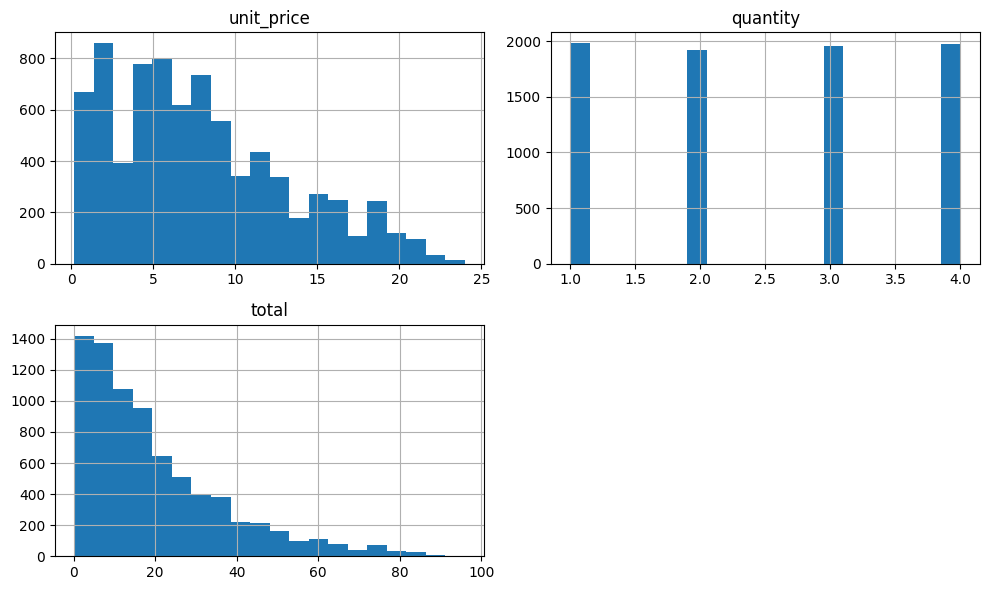

In [25]:
# Plot histograms for numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64'])
numeric_columns.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [26]:
# Convert the 'timestamp' column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])


In [27]:
category_sales = data.groupby('category')['quantity'].sum()
most_sold_category = category_sales.idxmax()
most_sold_quantity = category_sales.max()
print("Most sold category:", most_sold_category)
print("Quantity sold:", most_sold_quantity)


Most sold category: fruit
Quantity sold: 2439


Category with highest sales: kitchen
Sales amount: 14456.65
Customer type with highest quantity purchased: standard
Quantity purchased: 4032


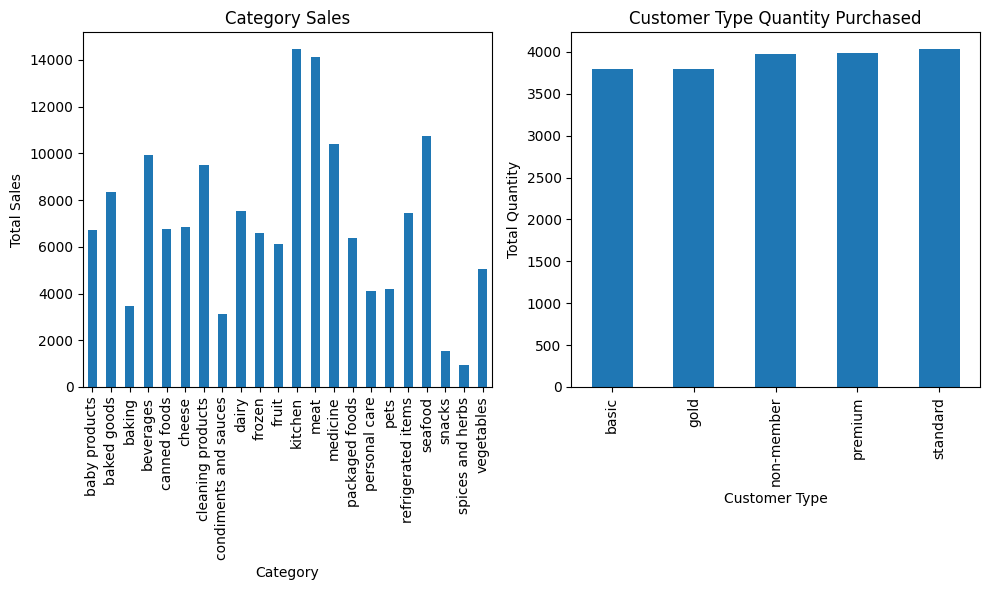

In [28]:
# Create a DataFrame
df = pd.DataFrame(data)

# Group by category and calculate total sales
category_sales = df.groupby("category")["total"].sum()

# Group by customer type and calculate total quantity purchased
customer_type_quantity = df.groupby("customer_type")["quantity"].sum()

# Find category with highest sales
max_sales_category = category_sales.idxmax()
max_sales_amount = category_sales.max()

# Find customer type with highest quantity purchased
max_quantity_customer_type = customer_type_quantity.idxmax()
max_quantity = customer_type_quantity.max()

# Print results
print("Category with highest sales:", max_sales_category)
print("Sales amount:", max_sales_amount)
print("Customer type with highest quantity purchased:", max_quantity_customer_type)
print("Quantity purchased:", max_quantity)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot category sales
plt.subplot(121)
category_sales.plot(kind="bar")
plt.title("Category Sales")
plt.xlabel("Category")
plt.ylabel("Total Sales")

# Plot customer type quantity
plt.subplot(122)
customer_type_quantity.plot(kind="bar")
plt.title("Customer Type Quantity Purchased")
plt.xlabel("Customer Type")
plt.ylabel("Total Quantity")

plt.tight_layout()
plt.show()


# CONCLUSION OF TASK

* Most sold category: fruit
* Quantity sold: 2439
* Category with highest sales: kitchen
* Sales amount: 14456.65
* Customer type with highest quantity purchased: standard
* Quantity purchased: 4032





